In [1]:
import os
import datasets
from tqdm.auto import tqdm

import pandas as pd

os.chdir("/n/home08/zkong/mufan/tmp/moebench")

In [3]:
import json

train_data = []
train_jsonl = "key/llama-cookbook/data/cache_dynamic_new/within_participant_within_sentence_train.jsonl"
with open(train_jsonl, "r") as f:
    for line in f:
        train_data.append(json.loads(line))

test_data = []
test_jsonl = "key/llama-cookbook/data/cache_dynamic_new/across_participant_across_sentence_test.jsonl"
with open(test_jsonl, "r") as f:
    for line in f:
        test_data.append(json.loads(line))

In [4]:
items_train = []
for item in tqdm(train_data, desc="Processing items_train"):
    # messages = []
    # roles = ["user", "assistant"]
    # for index, message in enumerate(item["conversations"]):
    #     messages.append({"role": roles[index % 2], "content": message})
    # item["messages"] = messages
    if "hitcounts" in item:
        # Remove hitcounts if it exists
        del item["hitcounts"]
    if "delta" in item:
        # Remove delta if it exists
        del item["delta"]
    items_train.append(item)
print(items_train[0])

items_test = []
for item in tqdm(test_data, desc="Processing items_test"):
    # messages = []
    # roles = ["user", "assistant"]
    # for index, message in enumerate(item["conversations"]):
    #     messages.append({"role": roles[index % 2], "content": message})
    # item["messages"] = messages
    if "hitcounts" in item:
        # Remove hitcounts if it exists
        del item["hitcounts"]
    if "delta" in item:
        # Remove delta if it exists
        del item["delta"]
    items_test.append(item)
print(items_test[0])


print(f"Number of training items: {len(items_train)}")
print(f"Number of test items: {len(items_test)}")

dataset_train = datasets.Dataset.from_list(items_train)
dataset_test = datasets.Dataset.from_list(items_test)
dataset = datasets.DatasetDict({"train": dataset_train, "test": dataset_test})
print(dataset)

Processing items_train:   0%|          | 0/1563827 [00:00<?, ?it/s]

{'participant_id': 107109, 'test_section_id': 1168669, 'input_string': 'Lynn, got to the office OK.', 'keystrokes': ['SHIFT', 'L', 'y', 'n', 'n', ',', ' ', 'g', 'o', 't', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'e', ' ', 'SHIFT', 'O', 'K', '.'], 'intervals': [0, 516, 222, 165, 294, 141, 159, 144, 162, 75, 123, 81, 639, 105, 87, 774, 84, 90, 183, 498, 111, 102, 93, 399, 78, 645, 144, 459], 'sentence_id': 1853, 'messages': [{'content': 'Translate the Time intervals to Keystrokes.\nTime intervals: 0 516 222 165 294 141 159 144 162 75 123 81 639 105 87 774 84 90 183 498 111 102 93 399 78 645 144 459', 'role': 'user'}, {'content': 'Lynn, got to the office OK.', 'role': 'assistant'}]}


Processing items_test:   0%|          | 0/10481 [00:00<?, ?it/s]

{'participant_id': 315553, 'test_section_id': 3396321, 'input_string': "I'll presume it is dead until I hear otherwise.", 'keystrokes': ['SHIFT', 'I', "'", 'l', 'l', ' ', 'p', 'r', 'e', 's', 'ARW_RIGHT', 'u', 'm', 'e', ' ', 'i', 't', ' ', 'i', 's', ' ', 'd', 'e', 'a', 'd', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'SHIFT', 'I', ' ', 'h', 'e', 'a', 'r', ' ', 'o', 't', 'h', 'e', 'r', 'w', 'i', 's', 'e', '.'], 'intervals': [0, 753, 453, 147, 378, 1017, 1014, 492, 306, 345, 63, 261, 894, 861, 678, 168, 192, 294, 234, 219, 735, 225, 381, 300, 267, 852, 240, 426, 279, 198, 285, 1011, 624, 975, 660, 198, 435, 342, 240, 903, 612, 201, 267, 252, 453, 597, 198, 249, 1017], 'sentence_id': 2262, 'messages': [{'content': 'Translate the Time intervals to Keystrokes.\nTime intervals: 0 753 453 147 378 1017 1014 492 306 345 63 261 894 861 678 168 192 294 234 219 735 225 381 300 267 852 240 426 279 198 285 1011 624 975 660 198 435 342 240 903 612 201 267 252 453 597 198 249 1017', 'role': 'user'}, {'content':

In [5]:
dataset.save_to_disk("open-instruct/data/0601_key_cache_dynamic_olmoe")

Saving the dataset (0/4 shards):   0%|          | 0/1563827 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10481 [00:00<?, ? examples/s]

In [6]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['participant_id', 'test_section_id', 'input_string', 'keystrokes', 'intervals', 'sentence_id', 'messages'],
        num_rows: 1563827
    })
    test: Dataset({
        features: ['participant_id', 'test_section_id', 'input_string', 'keystrokes', 'intervals', 'sentence_id', 'messages'],
        num_rows: 10481
    })
})


In [7]:
dataset.push_to_hub("WhenceFade/0601_key_cache_dynamic_olmoe")

Uploading the dataset shards:   0%|          | 0/4 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/391 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/391 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/391 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/391 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/11 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/WhenceFade/0601_key_cache_dynamic_olmoe/commit/186081a83b63556dac49695a025a6769460e504f', commit_message='Upload dataset', commit_description='', oid='186081a83b63556dac49695a025a6769460e504f', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/WhenceFade/0601_key_cache_dynamic_olmoe', endpoint='https://huggingface.co', repo_type='dataset', repo_id='WhenceFade/0601_key_cache_dynamic_olmoe'), pr_revision=None, pr_num=None)

In [8]:
disk_dataset = datasets.load_from_disk(
    "open-instruct/data/0601_key_cache_dynamic_olmoe"
)
print(disk_dataset)

DatasetDict({
    train: Dataset({
        features: ['participant_id', 'test_section_id', 'input_string', 'keystrokes', 'intervals', 'sentence_id', 'messages'],
        num_rows: 1563827
    })
    test: Dataset({
        features: ['participant_id', 'test_section_id', 'input_string', 'keystrokes', 'intervals', 'sentence_id', 'messages'],
        num_rows: 10481
    })
})


In [9]:
train_dataset = disk_dataset["train"]
for i in range(5):
    print(train_dataset[i])
    print(len(train_dataset[i]["intervals"]))
    print(len(train_dataset[i]["keystrokes"]))
print("Train dataset loaded successfully.")

{'participant_id': 107109, 'test_section_id': 1168669, 'input_string': 'Lynn, got to the office OK.', 'keystrokes': ['SHIFT', 'L', 'y', 'n', 'n', ',', ' ', 'g', 'o', 't', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'o', 'f', 'f', 'i', 'c', 'e', ' ', 'SHIFT', 'O', 'K', '.'], 'intervals': [0, 516, 222, 165, 294, 141, 159, 144, 162, 75, 123, 81, 639, 105, 87, 774, 84, 90, 183, 498, 111, 102, 93, 399, 78, 645, 144, 459], 'sentence_id': 1853, 'messages': [{'content': 'Translate the Time intervals to Keystrokes.\nTime intervals: 0 516 222 165 294 141 159 144 162 75 123 81 639 105 87 774 84 90 183 498 111 102 93 399 78 645 144 459', 'role': 'user'}, {'content': 'Lynn, got to the office OK.', 'role': 'assistant'}]}
28
29
{'participant_id': 273083, 'test_section_id': 2927181, 'input_string': "And if he's not, then he doesn't play.", 'keystrokes': ['SHIFT', 'A', 'n', 'd', ' ', 'i', 'f', ' ', 'h', 'e', "'", 's', ' ', 'n', 'o', 't', ',', ' ', 't', 'h', 'e', 'n', ' ', 'h', 'e', ' ', 'd', 'e', 'o', 'BKS

  0%|          | 0/1517890 [00:00<?, ?it/s]

  0%|          | 0/1517890 [00:00<?, ?it/s]

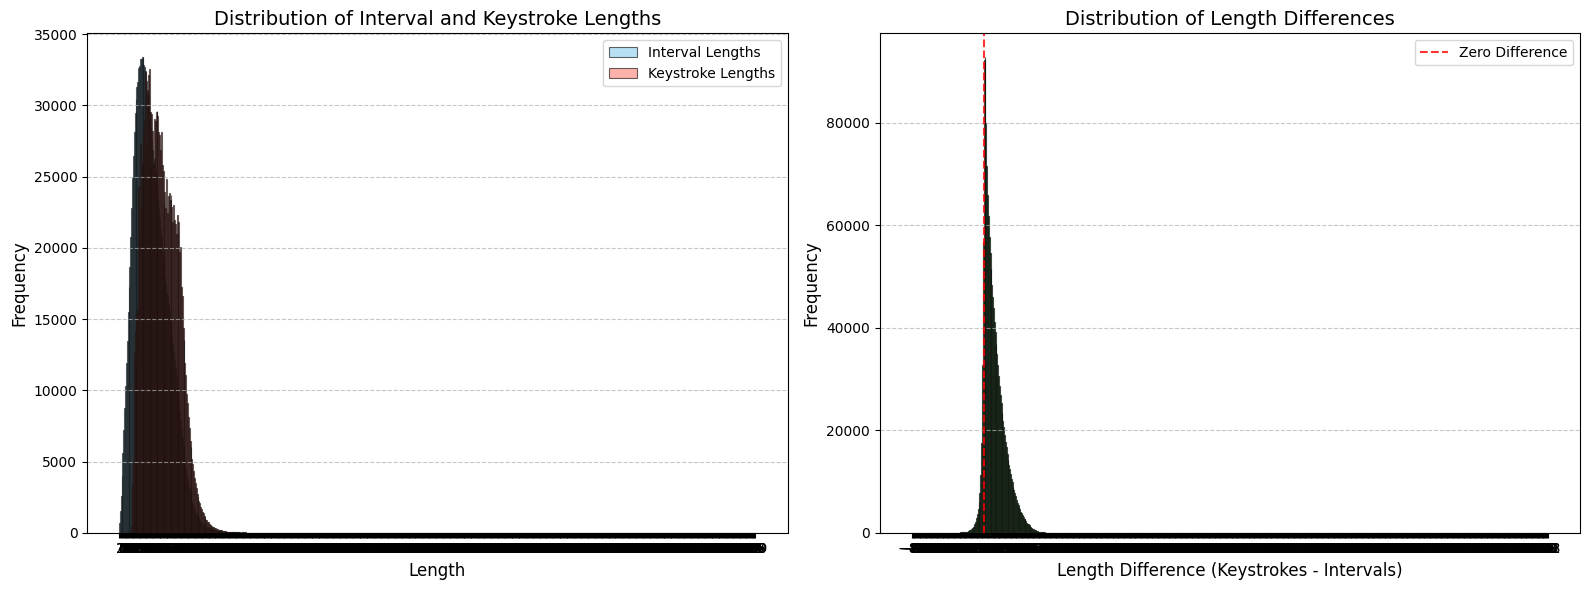

Interval lengths - Min: 1, Max: 500, Mean: 37.52
Keystroke lengths - Min: 2, Max: 729, Mean: 48.74
Length differences - Min: -85, Max: 663, Mean: 11.22


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

# Extract lengths of intervals and keystrokes
interval_lengths = [len(item["intervals"]) for item in tqdm(train_dataset)]
keystroke_lengths = [len(item["keystrokes"]) for item in tqdm(train_dataset)]

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Original comparison with better bins
min_val = min(min(interval_lengths), min(keystroke_lengths))
max_val = max(max(interval_lengths), max(keystroke_lengths))
bins = np.arange(min_val, max_val + 2) - 0.5

# Plot histogram for interval lengths
ax1.hist(
    interval_lengths,
    bins=bins,
    alpha=0.6,
    label="Interval Lengths",
    color="skyblue",
    edgecolor="black",
    linewidth=0.8,
)

# Plot histogram for keystroke lengths
ax1.hist(
    keystroke_lengths,
    bins=bins,
    alpha=0.6,
    label="Keystroke Lengths",
    color="salmon",
    edgecolor="black",
    linewidth=0.8,
)

ax1.set_xlabel("Length", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.set_title("Distribution of Interval and Keystroke Lengths", fontsize=14)
ax1.set_xticks(np.arange(min_val, max_val + 1))
ax1.legend(fontsize=10)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Second subplot: Difference histogram
length_differences = [k - i for k, i in zip(keystroke_lengths, interval_lengths)]
min_diff = min(length_differences)
max_diff = max(length_differences)
diff_bins = np.arange(min_diff, max_diff + 2) - 0.5

ax2.hist(
    length_differences,
    bins=diff_bins,
    alpha=0.7,
    color="lightgreen",
    edgecolor="black",
    linewidth=0.8,
)

ax2.set_xlabel("Length Difference (Keystrokes - Intervals)", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.set_title("Distribution of Length Differences", fontsize=14)
ax2.set_xticks(np.arange(min_diff, max_diff + 1))
ax2.grid(axis="y", linestyle="--", alpha=0.7)

# Add vertical line at zero for reference
ax2.axvline(x=0, color="red", linestyle="--", alpha=0.8, label="Zero Difference")
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Print some statistics
print(
    f"Interval lengths - Min: {min(interval_lengths)}, Max: {max(interval_lengths)}, Mean: {np.mean(interval_lengths):.2f}"
)
print(
    f"Keystroke lengths - Min: {min(keystroke_lengths)}, Max: {max(keystroke_lengths)}, Mean: {np.mean(keystroke_lengths):.2f}"
)
print(
    f"Length differences - Min: {min_diff}, Max: {max_diff}, Mean: {np.mean(length_differences):.2f}"
)